### Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

import os
for dirname,_,filenames in os.walk("splitted_data"):
    for filename in filenames:
        print(os.path.join(dirname,filename))

splitted_data\X_test.csv
splitted_data\X_train.csv
splitted_data\y_test.csv
splitted_data\y_train.csv


### Data Loading

In [2]:
X_train=pd.read_csv("splitted_data/X_train.csv")
X_test=pd.read_csv("splitted_data/X_test.csv")
y_train=pd.read_csv("splitted_data/y_train.csv")
y_test=pd.read_csv("splitted_data/y_test.csv")

In [3]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(20000, 41) (5000, 41) (20000, 1) (5000, 1)


In [4]:
X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.000000,0.0,0.710145,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,1.000000,0.000000,0.00,1.00,0.0,0.00,0.08,0.0,0.86,1.00
1,0.000000,0.0,0.347826,0.1,2.282668e-07,2.351257e-07,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00
2,0.000000,0.0,0.956522,0.3,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,1.000000,0.019685,0.02,0.05,0.0,0.00,1.00,1.0,0.00,0.00
3,0.000000,0.5,0.710145,0.1,7.246566e-10,0.000000e+00,0.0,0.0,0.0,0.0,...,1.000000,0.397638,0.40,0.06,1.0,0.00,0.00,0.0,0.00,0.00
4,0.000093,0.0,0.275362,0.1,6.029143e-07,0.000000e+00,0.0,0.0,0.0,0.0,...,0.019685,0.177165,1.00,0.00,1.0,0.09,0.00,0.0,0.17,0.02


In [5]:
X_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.000000,0.0,0.275362,0.1,2.420353e-07,0.000000,0.0,0.0,0.0,0.000000,...,0.047244,0.153543,1.00,0.00,1.0,0.10,0.00,0.00,0.0,0.0
1,0.004288,0.0,0.869565,0.1,1.094956e-06,0.000002,0.0,0.0,0.0,0.100000,...,0.000000,0.007874,1.00,0.00,1.0,0.67,0.00,0.00,0.0,0.0
2,0.000000,0.0,0.275362,0.1,0.000000e+00,0.000002,0.0,0.0,0.0,0.033333,...,0.007874,0.015748,1.00,0.00,1.0,0.40,0.00,0.00,0.0,0.0
3,0.235970,0.0,0.275362,0.1,7.333525e-07,0.000002,0.0,0.0,0.0,0.633333,...,1.000000,0.051181,0.05,0.02,0.0,0.00,0.16,0.00,0.0,0.0
4,0.000000,0.0,0.275362,0.1,2.173970e-08,0.000000,0.0,0.0,0.0,0.000000,...,0.015748,0.149606,1.00,0.00,1.0,0.15,0.00,0.03,0.0,0.0


In [6]:
y_train.head()

,xAttack
0,3
1,0
2,1
3,3
4,2


In [7]:
y_test.head()

,xAttack
0,2
1,4
2,4
3,2
4,2


In [8]:
from tensorflow.keras.utils import to_categorical
Y_train=to_categorical(y_train)
Y_test=to_categorical(y_test)

In [9]:
Y_train[:5]

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [10]:
Y_test[:5]

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

### Algorithm:1 ArtificialNeuralNetwork

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [12]:
model=Sequential()
model.add(Dense(units=64,activation='relu',input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(units=128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(units=256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(units=5,activation='softmax'))

In [13]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [14]:
history=model.fit(x=X_train,
                 y=Y_train,
                 batch_size=32,
                 epochs=20,
                 validation_data=(X_test,Y_test))

Epoch 1/20
625/625 [==============================] - 4s 3ms/step - loss: 0.3916 - accuracy: 0.8664 - val_loss: 0.1430 - val_accuracy: 0.9382
Epoch 2/20
625/625 [==============================] - 2s 3ms/step - loss: 0.2231 - accuracy: 0.9255 - val_loss: 0.1098 - val_accuracy: 0.9606
Epoch 3/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1868 - accuracy: 0.9384 - val_loss: 0.1003 - val_accuracy: 0.9664
Epoch 4/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1609 - accuracy: 0.9470 - val_loss: 0.0845 - val_accuracy: 0.9686
Epoch 5/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1504 - accuracy: 0.9506 - val_loss: 0.0811 - val_accuracy: 0.9718
Epoch 6/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1394 - accuracy: 0.9535 - val_loss: 0.0855 - val_accuracy: 0.9682
Epoch 7/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1347 - accuracy: 0.9553 - val_loss: 0.0730 - val_accuracy: 0.9750
Epoch 

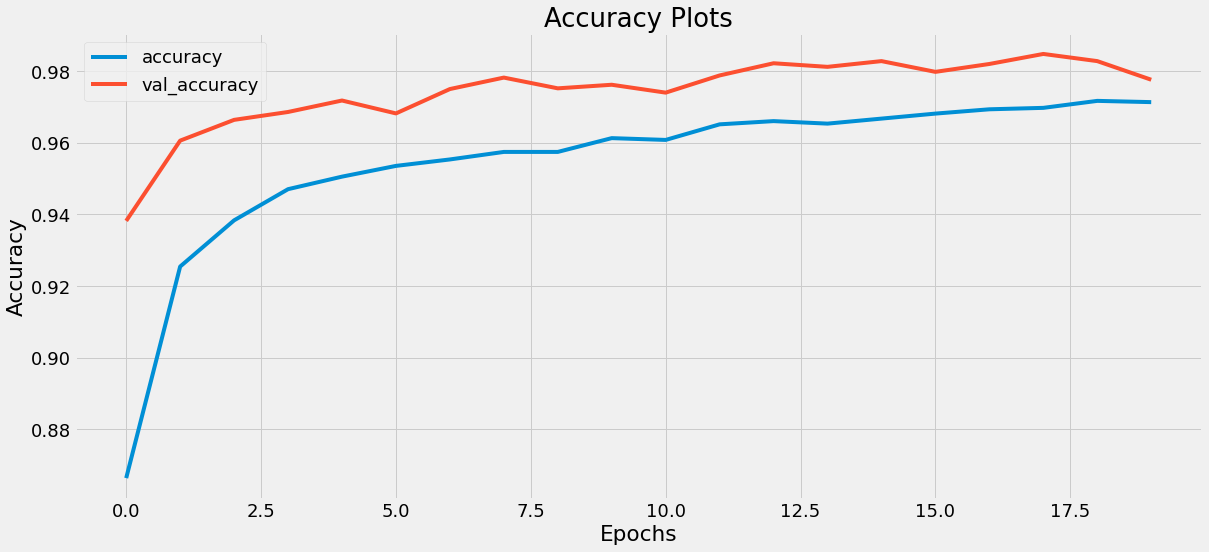

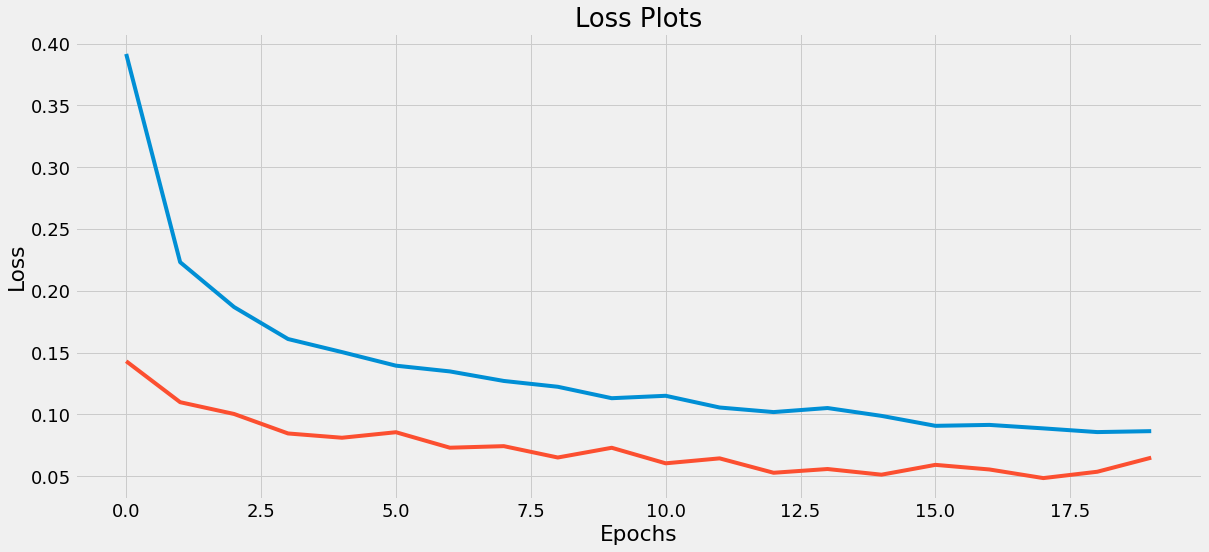

In [15]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams["font.size"]=18
    plt.plot(history.history['accuracy'],label='accuracy')
    plt.plot(history.history['val_accuracy'],label='val_accuracy')
    plt.title(label='Accuracy Plots')
    plt.xlabel(xlabel="Epochs")
    plt.ylabel(ylabel="Accuracy")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(18,8))
    plt.rcParams['font.size']=18
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.title(label='Loss Plots')
    plt.xlabel(xlabel="Epochs")
    plt.ylabel(ylabel="Loss")
    plt.show()

In [16]:
Ann_pred=model.predict(X_test,batch_size=32,verbose=1)
print(Ann_pred)

157/157 [==============================] - 0s 1ms/step
[[2.34189047e-05 9.99921083e-01 5.30815014e-05 2.72363887e-09
  2.36835376e-06]
 [9.98478472e-01 5.60091867e-04 6.70501089e-04 1.87155427e-04
  1.03763756e-04]
 [1.08746875e-07 9.99999762e-01 2.22059402e-08 6.02474444e-08
  5.20773735e-09]
 ...
 [6.47197812e-05 5.88876037e-06 1.02208724e-04 1.20790464e-05
  9.99815166e-01]
 [8.68574134e-04 6.51945156e-05 5.44426393e-06 9.99025583e-01
  3.52378229e-05]
 [9.95992482e-01 3.92168015e-03 1.45229887e-05 1.70552212e-05
  5.43691203e-05]]


In [17]:
Ann_labels=[]
for pred in Ann_pred:
    Ann_labels.append(np.argmax(pred))
print(Ann_labels)

[1, 0, 1, 0, 2, 4, 4, 2, 1, 3, 1, 4, 0, 4, 0, 4, 1, 2, 1, 2, 3, 2, 1, 3, 4, 1, 1, 4, 2, 0, 2, 4, 0, 2, 0, 0, 1, 1, 3, 0, 0, 2, 1, 1, 0, 2, 2, 0, 3, 0, 2, 1, 2, 2, 0, 2, 0, 2, 3, 0, 2, 0, 0, 4, 2, 3, 1, 0, 0, 4, 2, 1, 4, 1, 4, 4, 3, 3, 3, 3, 1, 3, 4, 4, 4, 0, 0, 2, 2, 0, 2, 4, 0, 3, 4, 3, 4, 0, 1, 4, 4, 4, 1, 1, 3, 3, 3, 1, 1, 0, 4, 3, 2, 2, 1, 1, 4, 2, 4, 0, 4, 1, 1, 1, 2, 3, 2, 4, 3, 1, 0, 2, 4, 0, 1, 0, 2, 2, 1, 0, 3, 1, 2, 3, 4, 1, 3, 1, 2, 1, 3, 4, 0, 2, 4, 4, 3, 3, 1, 2, 4, 2, 2, 3, 0, 1, 3, 2, 2, 3, 3, 0, 0, 2, 3, 0, 2, 1, 3, 4, 3, 2, 2, 3, 1, 4, 1, 0, 2, 2, 3, 0, 3, 4, 2, 1, 3, 2, 2, 3, 4, 2, 2, 2, 4, 1, 1, 0, 4, 2, 2, 1, 2, 2, 2, 0, 0, 4, 4, 2, 2, 4, 4, 4, 1, 3, 1, 4, 1, 3, 2, 2, 1, 4, 0, 2, 3, 2, 3, 0, 1, 1, 2, 2, 1, 4, 3, 0, 4, 3, 2, 2, 1, 2, 3, 3, 2, 2, 0, 0, 3, 2, 2, 4, 0, 0, 4, 3, 2, 4, 0, 4, 2, 3, 4, 3, 2, 2, 0, 3, 2, 1, 1, 3, 1, 4, 1, 4, 4, 1, 4, 4, 3, 4, 3, 4, 2, 1, 2, 4, 3, 4, 3, 0, 1, 2, 2, 3, 2, 3, 4, 0, 2, 3, 1, 3, 1, 2, 2, 4, 2, 4, 1, 4, 0, 3, 1, 4, 0, 3, 3, 0, 2, 

In [18]:
true_labels=list(y_test['xAttack'].values)
print(true_labels)

[1, 0, 1, 0, 2, 4, 4, 2, 1, 3, 1, 4, 0, 4, 0, 4, 1, 2, 1, 2, 3, 2, 1, 3, 4, 1, 1, 4, 2, 0, 2, 4, 0, 2, 0, 0, 1, 1, 3, 0, 0, 2, 1, 1, 0, 2, 0, 0, 3, 0, 2, 1, 2, 2, 0, 2, 0, 2, 3, 0, 2, 0, 0, 4, 2, 3, 1, 0, 0, 4, 2, 1, 4, 1, 4, 4, 3, 3, 3, 0, 1, 3, 4, 4, 4, 0, 0, 2, 2, 0, 2, 4, 0, 3, 4, 3, 4, 0, 1, 4, 4, 4, 1, 1, 3, 3, 3, 1, 1, 0, 4, 3, 2, 2, 0, 1, 4, 2, 4, 0, 4, 1, 1, 1, 2, 3, 2, 4, 3, 1, 0, 2, 4, 0, 1, 0, 2, 2, 1, 0, 3, 1, 2, 3, 4, 1, 3, 1, 2, 1, 3, 4, 0, 2, 4, 4, 3, 3, 1, 2, 4, 2, 2, 3, 0, 1, 3, 2, 2, 3, 3, 0, 0, 2, 3, 0, 2, 1, 3, 4, 3, 2, 2, 3, 1, 4, 1, 0, 2, 2, 3, 0, 3, 4, 2, 1, 3, 2, 0, 3, 4, 2, 2, 2, 4, 1, 1, 0, 4, 0, 3, 1, 2, 2, 2, 0, 0, 4, 4, 2, 2, 4, 4, 4, 1, 3, 1, 4, 1, 3, 2, 2, 1, 4, 0, 2, 3, 2, 3, 0, 1, 1, 2, 2, 1, 4, 3, 0, 4, 3, 2, 2, 1, 0, 3, 3, 2, 2, 0, 0, 3, 2, 2, 4, 0, 0, 4, 3, 2, 4, 0, 4, 2, 3, 4, 3, 2, 2, 0, 3, 2, 1, 1, 3, 1, 4, 1, 4, 4, 1, 4, 4, 3, 4, 3, 4, 2, 1, 2, 4, 3, 4, 3, 0, 1, 2, 2, 3, 2, 3, 4, 0, 2, 3, 1, 3, 1, 2, 2, 4, 2, 2, 1, 4, 0, 3, 1, 4, 0, 3, 3, 0, 2, 

### Result Analysis

In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [20]:
class_labels=['normal','dos','r2l','probe','u2r']

$$Accuracy$$$$Score$$

In [21]:
Ann_accuracy=accuracy_score(y_true=true_labels,y_pred=Ann_labels)
print(f"Validation accuracy of ArtificialNeuralNetwork is {Ann_accuracy*100.0:.2f}%")

Validation accuracy of ArtificialNeuralNetwork is 97.76%


$$Classification$$$$Report$$

In [22]:
print(classification_report(y_true=true_labels,y_pred=Ann_labels,target_names=class_labels))

              precision    recall  f1-score   support

      normal       0.99      0.94      0.96      1005
         dos       0.99      1.00      0.99       940
         r2l       0.96      0.96      0.96      1028
       probe       0.99      0.99      0.99      1007
         u2r       0.95      1.00      0.97      1020

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



$$Confusion$$$$Matrxi$$

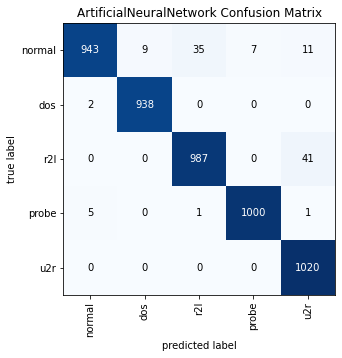

In [23]:
from mlxtend.plotting import plot_confusion_matrix
ax=plot_confusion_matrix(conf_mat=confusion_matrix(y_true=true_labels,y_pred=Ann_labels),
                        figsize=(5,5),
                        class_names=class_labels,
                        cmap=plt.cm.Blues)
plt.title(label='ArtificialNeuralNetwork Confusion Matrix')
plt.xticks(rotation=90)
plt.show()

$$Model$$$$Saving$$

In [24]:
model.save("models/ArtificialNeuralNetwork_model.h5")

---

### Algorithm:2 RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=2,min_samples_split=50,min_samples_leaf=50)
RF_model.fit(X_train.values,y_train.values.ravel())

RandomForestClassifier(min_samples_leaf=50, min_samples_split=50,
                       n_estimators=2)

In [41]:
RF_pred=RF_model.predict(X_test)
RF_pred=RF_pred.tolist()
print(RF_pred)

[1, 0, 1, 0, 2, 4, 4, 2, 1, 3, 1, 4, 0, 4, 0, 4, 1, 2, 1, 2, 3, 2, 1, 3, 4, 1, 1, 4, 2, 0, 2, 4, 0, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 3, 0, 2, 1, 2, 2, 0, 0, 0, 2, 3, 0, 2, 0, 0, 4, 2, 3, 1, 0, 0, 4, 2, 1, 4, 1, 4, 4, 3, 3, 3, 4, 1, 3, 4, 4, 4, 0, 0, 2, 2, 0, 2, 4, 0, 3, 4, 3, 4, 0, 1, 4, 4, 4, 1, 1, 3, 3, 3, 1, 1, 0, 4, 3, 2, 2, 0, 1, 4, 2, 4, 0, 4, 1, 1, 1, 2, 3, 2, 4, 3, 1, 0, 2, 4, 0, 1, 0, 2, 2, 1, 0, 3, 1, 2, 3, 4, 1, 3, 1, 2, 1, 3, 4, 0, 0, 4, 4, 3, 3, 1, 2, 4, 2, 2, 3, 0, 1, 3, 2, 2, 3, 3, 0, 4, 2, 3, 0, 2, 1, 3, 4, 3, 2, 2, 3, 1, 4, 1, 0, 2, 2, 3, 0, 3, 4, 2, 1, 3, 2, 0, 3, 4, 2, 2, 2, 4, 1, 1, 0, 4, 0, 0, 1, 2, 2, 2, 0, 0, 4, 4, 2, 2, 4, 4, 4, 1, 3, 1, 4, 1, 3, 2, 2, 1, 4, 0, 2, 3, 2, 3, 0, 1, 1, 2, 2, 0, 4, 3, 0, 4, 3, 2, 2, 1, 0, 3, 3, 2, 2, 2, 0, 3, 2, 2, 4, 0, 0, 4, 3, 2, 4, 0, 4, 0, 3, 4, 3, 2, 2, 0, 3, 2, 1, 1, 3, 1, 4, 1, 4, 4, 1, 4, 4, 3, 4, 4, 4, 2, 1, 2, 4, 3, 4, 3, 0, 1, 2, 2, 3, 2, 3, 4, 0, 2, 3, 1, 3, 1, 2, 2, 4, 0, 2, 1, 4, 2, 3, 1, 4, 0, 3, 0, 0, 2, 

In [42]:
y_tests=y_test.values.ravel().tolist()
print(y_tests)

[1, 0, 1, 0, 2, 4, 4, 2, 1, 3, 1, 4, 0, 4, 0, 4, 1, 2, 1, 2, 3, 2, 1, 3, 4, 1, 1, 4, 2, 0, 2, 4, 0, 2, 0, 0, 1, 1, 3, 0, 0, 2, 1, 1, 0, 2, 0, 0, 3, 0, 2, 1, 2, 2, 0, 2, 0, 2, 3, 0, 2, 0, 0, 4, 2, 3, 1, 0, 0, 4, 2, 1, 4, 1, 4, 4, 3, 3, 3, 0, 1, 3, 4, 4, 4, 0, 0, 2, 2, 0, 2, 4, 0, 3, 4, 3, 4, 0, 1, 4, 4, 4, 1, 1, 3, 3, 3, 1, 1, 0, 4, 3, 2, 2, 0, 1, 4, 2, 4, 0, 4, 1, 1, 1, 2, 3, 2, 4, 3, 1, 0, 2, 4, 0, 1, 0, 2, 2, 1, 0, 3, 1, 2, 3, 4, 1, 3, 1, 2, 1, 3, 4, 0, 2, 4, 4, 3, 3, 1, 2, 4, 2, 2, 3, 0, 1, 3, 2, 2, 3, 3, 0, 0, 2, 3, 0, 2, 1, 3, 4, 3, 2, 2, 3, 1, 4, 1, 0, 2, 2, 3, 0, 3, 4, 2, 1, 3, 2, 0, 3, 4, 2, 2, 2, 4, 1, 1, 0, 4, 0, 3, 1, 2, 2, 2, 0, 0, 4, 4, 2, 2, 4, 4, 4, 1, 3, 1, 4, 1, 3, 2, 2, 1, 4, 0, 2, 3, 2, 3, 0, 1, 1, 2, 2, 1, 4, 3, 0, 4, 3, 2, 2, 1, 0, 3, 3, 2, 2, 0, 0, 3, 2, 2, 4, 0, 0, 4, 3, 2, 4, 0, 4, 2, 3, 4, 3, 2, 2, 0, 3, 2, 1, 1, 3, 1, 4, 1, 4, 4, 1, 4, 4, 3, 4, 3, 4, 2, 1, 2, 4, 3, 4, 3, 0, 1, 2, 2, 3, 2, 3, 4, 0, 2, 3, 1, 3, 1, 2, 2, 4, 2, 2, 1, 4, 0, 3, 1, 4, 0, 3, 3, 0, 2, 

### Result Anlysis

$$Accuracy$$$$Score$$

In [43]:
RF_accuracy=accuracy_score(y_true=y_tests,y_pred=RF_pred)
print(f"Validation accuracy of RandomForestClassifier is {RF_accuracy*100.0:.2f}%")

Validation accuracy of RandomForestClassifier is 95.72%


$$Classification$$$$Report$$

In [44]:
print(classification_report(y_true=y_tests,y_pred=RF_pred,target_names=class_labels))

              precision    recall  f1-score   support

      normal       0.94      0.87      0.91      1005
         dos       0.99      0.97      0.98       940
         r2l       0.95      0.97      0.96      1028
       probe       0.94      0.98      0.96      1007
         u2r       0.96      1.00      0.98      1020

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



$$Confusion$$$$Matrxi$$

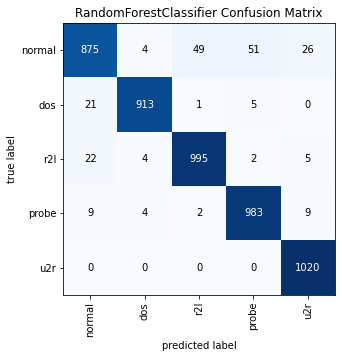

In [45]:
from mlxtend.plotting import plot_confusion_matrix
ax=plot_confusion_matrix(conf_mat=confusion_matrix(y_true=y_tests,y_pred=RF_pred),
                        figsize=(5,5),
                        class_names=class_labels,
                        cmap=plt.cm.Blues)
plt.title(label='RandomForestClassifier Confusion Matrix')
plt.xticks(rotation=90)
plt.show()

In [47]:
with open(file='models/RandomForestClassifier_model.pkl',mode='wb') as file:
    pickle.dump(obj=RF_model,file=file)